In [1]:
import pandas as pd
df1=pd.read_csv("/home/tarun/Quantum ML/Rashita(datat)/new_data.csv")
df1

,Destination Port,Flow Duration,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,outlier
0,54865,3,12,0,6,6,6.0,0.00000,0,0,...,0.0,0.0,0,0,0.0,0.0,0,0,1,1
1,55054,109,6,6,6,6,6.0,0.00000,6,6,...,0.0,0.0,0,0,0.0,0.0,0,0,1,1
2,55055,52,6,6,6,6,6.0,0.00000,6,6,...,0.0,0.0,0,0,0.0,0.0,0,0,1,1
3,46236,34,6,6,6,6,6.0,0.00000,6,6,...,0.0,0.0,0,0,0.0,0.0,0,0,1,1
4,54863,3,12,0,6,6,6.0,0.00000,0,0,...,0.0,0.0,0,0,0.0,0.0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2520793,53,32215,112,152,28,28,28.0,0.00000,76,76,...,0.0,0.0,0,0,0.0,0.0,0,0,1,1
2520794,53,324,84,362,42,42,42.0,0.00000,181,181,...,0.0,0.0,0,0,0.0,0.0,0,0,1,1
2520795,58030,82,31,6,31,0,15.5,21.92031,6,6,...,0.0,0.0,0,0,0.0,0.0,0,0,1,1
2520796,53,1048635,192,256,32,32,32.0,0.00000,128,128,...,0.0,0.0,0,0,0.0,0.0,0,0,1,1


In [2]:
df1=df1.drop(columns=['outlier'])
df1

,Destination Port,Flow Duration,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,12,0,6,6,6.0,0.00000,0,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,1
1,55054,109,6,6,6,6,6.0,0.00000,6,6,...,20,0.0,0.0,0,0,0.0,0.0,0,0,1
2,55055,52,6,6,6,6,6.0,0.00000,6,6,...,20,0.0,0.0,0,0,0.0,0.0,0,0,1
3,46236,34,6,6,6,6,6.0,0.00000,6,6,...,20,0.0,0.0,0,0,0.0,0.0,0,0,1
4,54863,3,12,0,6,6,6.0,0.00000,0,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2520793,53,32215,112,152,28,28,28.0,0.00000,76,76,...,20,0.0,0.0,0,0,0.0,0.0,0,0,1
2520794,53,324,84,362,42,42,42.0,0.00000,181,181,...,20,0.0,0.0,0,0,0.0,0.0,0,0,1
2520795,58030,82,31,6,31,0,15.5,21.92031,6,6,...,32,0.0,0.0,0,0,0.0,0.0,0,0,1
2520796,53,1048635,192,256,32,32,32.0,0.00000,128,128,...,20,0.0,0.0,0,0,0.0,0.0,0,0,1


In [3]:
# sample_df1=df1.loc[100000:200000]

In [4]:
sample_df1 = df1.sample(n=100000, replace=True, random_state=42)

In [5]:
X = sample_df1.drop(columns=['Label'])
y = sample_df1['Label']

In [6]:
y.value_counts()

Label
 1    83149
-1    16851
Name: count, dtype: int64

In [7]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from qiskit_machine_learning.algorithms import QSVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np
import time

# Make sure X_sample and y_sample are defined before this

# Step 3: Standardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

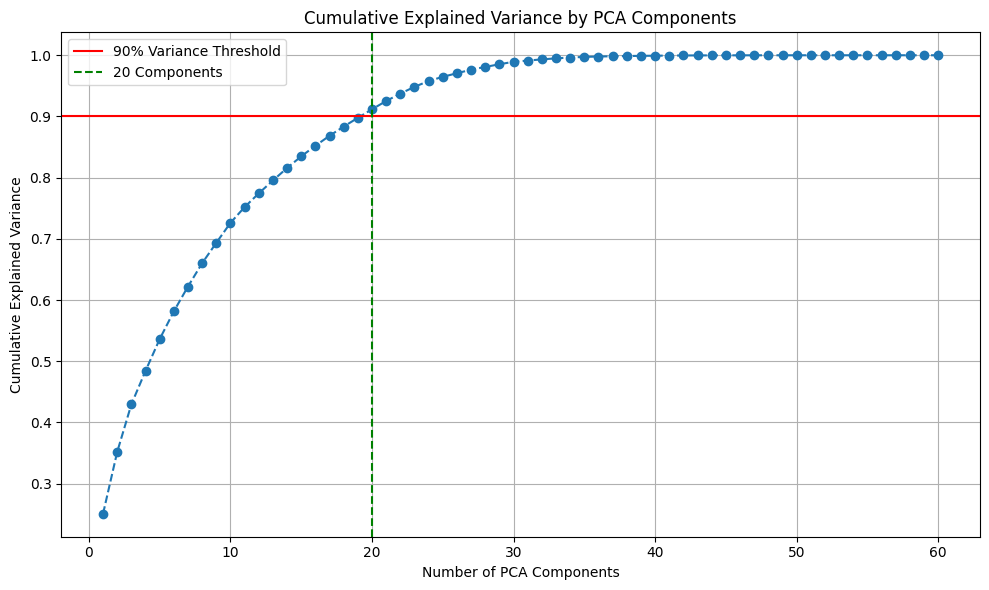

Number of components to retain 90% variance: 20


In [8]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Apply PCA without limiting number of components
pca_full = PCA()
pca_full.fit(X_scaled)  # Use scaled (not PCA-reduced) training data

# Explained variance and cumulative sum
explained_variance = pca_full.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Find number of components for 90% variance
n_components_90 = np.argmax(cumulative_variance >= 0.90) + 1

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.axhline(y=0.90, color='red', linestyle='-', label='90% Variance Threshold')
plt.axvline(x=n_components_90, color='green', linestyle='--', label=f'{n_components_90} Components')
plt.xlabel('Number of PCA Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance by PCA Components')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Optional: print number of components for 90% variance
print(f"Number of components to retain 90% variance: {n_components_90}")


In [ ]:
from sklearn.decomposition import PCA
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Fit PCA and transform data with n_components_90
pca = PCA(n_components=n_components_90)
X_pca = pca.fit_transform(X_scaled)

# Step 2: Convert to DataFrame
pca_columns = [f'PC{i+1}' for i in range(n_components_90)]
df_pca = pd.DataFrame(X_pca, columns=pca_columns)

# If you have labels (e.g., target classes), add them for color encoding
# Assuming y contains labels
# df_pca['Label'] = y

# Step 3: Plot pairplot
sns.pairplot(df_pca)  # or sns.pairplot(df_pca, hue='Label') if you have labels
plt.suptitle('Pairplot of PCA-Reduced Data (90% Variance)', y=1.02)
plt.tight_layout()
plt.show()


In [10]:

# Step 4: PCA (e.g., retain 90% variance or set to fixed qubits like 6)
pca = PCA(n_components=20)  # or PCA(n_components=6)
X_pca = pca.fit_transform(X_scaled)

In [11]:
# Step 2: Train-test split on scaled data (no SMOTE)
X_train, X_test, y_train, y_test = train_test_split(
   X_pca, y, test_size=0.2, stratify=y, random_state=42
)

In [12]:
from qiskit.circuit.library import ZFeatureMap, ZZFeatureMap, PauliFeatureMap
from qiskit_aer import AerSimulator, QasmSimulator
from qiskit import transpile
#from qiskit_algorithms.utils import algorithm_globals
from qiskit_machine_learning.kernels import FidelityQuantumKernel, FidelityStatevectorKernel
from qiskit_machine_learning.algorithms import PegasosQSVC
from qiskit_machine_learning.algorithms import QSVC
from qiskit.providers import BackendV2 as Backend
from qiskit.transpiler import Target
from qiskit_ibm_runtime import SamplerV2 as Sampler, Session
from qiskit.circuit.library import ZFeatureMap, ZZFeatureMap
# from qiskit_algorithms.utils import algorithm_globals
from qiskit_machine_learning.kernels import FidelityQuantumKernel
from qiskit_machine_learning.algorithms import PegasosQSVC
from qiskit_machine_learning.algorithms import QSVC
from qiskit.primitives import StatevectorSampler
from qiskit_machine_learning.state_fidelities import ComputeUncompute
from qiskit_machine_learning.algorithms import QSVC# number of qubits is equal to the number of features


In [13]:
from qiskit.quantum_info import Statevector
from qiskit.circuit.library import Initialize
from qiskit import QuantumCircuit
import numpy as np

# --- Helper Function: Amplitude Encoding to Statevector ---
def amplitude_encoding_statevector(x):
    norm = np.linalg.norm(x)
    x_norm = x / norm if norm != 0 else x

    # Pad to power of 2
    target_dim = 2 ** int(np.ceil(np.log2(len(x_norm))))
    padded = np.zeros(target_dim)
    padded[:len(x_norm)] = x_norm

    init_gate = Initialize(padded)
    init_gate.label = "AmpEncode"
    
    qc = QuantumCircuit(int(np.log2(target_dim)))
    qc.append(init_gate, qc.qubits)

    return Statevector(qc)

# --- Compute statevectors ---
def get_statevectors(X):
    return [amplitude_encoding_statevector(x) for x in X]

# --- Compute fidelity kernel matrix ---
def compute_kernel_matrix(states_A, states_B):
    return np.array([[np.abs(a.inner(b))**2 for b in states_B] for a in states_A])


In [14]:
# Assume you have X_train, X_test, y_train, y_test already defined
start_time=time.time()
train_states = get_statevectors(X_train)
test_states = get_statevectors(X_test)

# Compute kernel matrices
K_train = compute_kernel_matrix(train_states, train_states)  # shape: (n_train, n_train)
K_test = compute_kernel_matrix(test_states, train_states)    # shape: (n_test, n_train)
end_time=time.time()
Time=end_time-start_time
print(Time)

20286.241461992264


In [15]:
# # backend=AerSimulator()
# backend=QasmSimulator(method='statevector_gpu')
# session=Session(backend)
# sampler=Sampler(mode=session)
# num_qubits = 15
# feature_map = ZFeatureMap(feature_dimension=19, reps=2)
# feature_map=transpile(feature_map, backend=backend)
# fidelity = ComputeUncompute(sampler=sampler)
# qkernel = FidelityQuantumKernel(fidelity=fidelity, feature_map=feature_map)
# # qkernel = FidelityStatevectorKernel(feature_map=feature_map)

In [16]:
# feature_map.draw('mpl')

In [17]:
import time
#from qiskit_machine_learning.kernels import QuantumKernel
from qiskit_machine_learning.algorithms import QSVC
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Initialize and train QSVC
start_time = time.time()
qsvc = SVC(kernel='precomputed')
qsvc.fit(K_train, y_train)

# qsvc.fit(X_train, y_train)
y_pred = qsvc.predict(K_test)
end_time = time.time()
tt=end_time-start_time
print(tt)

7.483606815338135


In [18]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9596
              precision    recall  f1-score   support

          -1       0.89      0.86      0.88      3370
           1       0.97      0.98      0.98     16630

    accuracy                           0.96     20000
   macro avg       0.93      0.92      0.93     20000
weighted avg       0.96      0.96      0.96     20000



QSVC Training Accuracy: 1.0000
QSVC Testing Accuracy: 0.9000

Classification Report (Test Data):
              precision    recall  f1-score   support

          -1       1.00      0.33      0.50         3
           1       0.89      1.00      0.94        17

    accuracy                           0.90        20
   macro avg       0.95      0.67      0.72        20
weighted avg       0.91      0.90      0.88        20



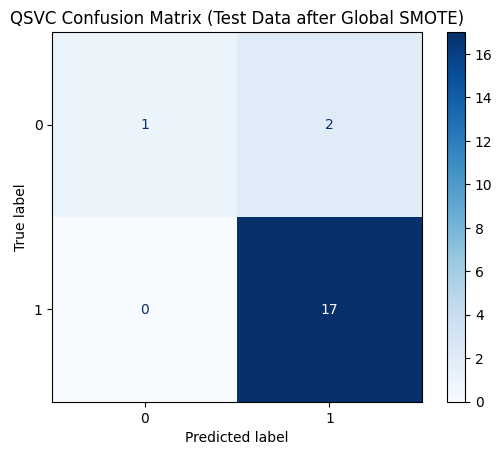

In [59]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from qiskit_machine_learning.algorithms import QSVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np
import time

y_train_pred = qsvc.predict(X_train_pca)
y_test_pred = qsvc.predict(X_test_pca)

# Step 7: Evaluation
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

print(f"QSVC Training Accuracy: {train_acc:.4f}")
print(f"QSVC Testing Accuracy: {test_acc:.4f}")
#print(f"Training Time: {train_time:.2f} sec")
#print(f"Prediction Time: {pred_time:.2f} sec")

print("\nClassification Report (Test Data):")
print(classification_report(y_test, y_test_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("QSVC Confusion Matrix (Test Data after Global SMOTE)")
plt.show()

In [63]:
tt=end_time-start_time

In [64]:
print(tt)

51.3122992515564
